# Crosslingual Gender Detection

# Organizing datasets

Organizing combined datasets by gender

In [ ]:
import os
import shutil
from tqdm import tqdm

def create_directory_structure(base_dir, sub_dirs):
    path = os.path.join(base_dir, *sub_dirs)
    if not os.path.exists(path):
        os.makedirs(path)
    return path

def organize_ravdess_data_by_gender(source_dirs, dest_dir):
    all_files = []
    
    for source_dir in source_dirs:
        for root, dirs, files in os.walk(source_dir):
            for file in files:
                all_files.append(os.path.join(root, file))
    
    total_files = len(all_files)

    with tqdm(total=total_files, desc="Organizing RAVDESS Dataset by Gender") as pbar:
        for file in all_files:
            filename = os.path.basename(file)
            parts = filename.split('-')
            if len(parts) < 7:
                continue
            
            actor = parts[6].split('.')[0]  # Extract actor ID
            gender_folder = 'Male' if int(actor) % 2 != 0 else 'Female'

            # Create gender folder in destination directory
            new_folder = create_directory_structure(dest_dir, [gender_folder])
            shutil.copy(file, new_folder)
            pbar.update(1)

    print("RAVDESS dataset has been successfully organized by gender!")

def get_emodb_gender(speaker_number):
    male_speakers = [3, 10, 11, 12, 15]
    female_speakers = [8, 9, 13, 14, 16]
    if speaker_number in male_speakers:
        return 'Male'
    elif speaker_number in female_speakers:
        return 'Female'
    return 'Unknown'

def organize_emodb_data_by_gender(source_dir, dest_dir):
    all_files = []

    for root, dirs, files in os.walk(source_dir):
        for file in files:
            all_files.append(os.path.join(root, file))

    total_files = len(all_files)

    with tqdm(total=total_files, desc="Organizing EMODB Dataset by Gender") as pbar:
        for file in all_files:
            filename = os.path.basename(file)
            parts = filename.split('.')
            if len(parts) < 2:
                continue

            name_part = parts[0]
            if len(name_part) < 2:
                continue
            
            speaker = name_part[:2]
            
            try:
                speaker_num = int(speaker)
                gender_folder = get_emodb_gender(speaker_num)
            except ValueError:
                gender_folder = 'Unknown'
            
            # Create gender folder in destination directory
            new_folder = create_directory_structure(dest_dir, [gender_folder])
            shutil.copy(file, new_folder)
            pbar.update(1)

    print("EMODB dataset has been successfully organized by gender!")

def get_hindi_gender(speaker_folder):
    male_speakers = ['3', '6', '7', '8', '10']
    female_speakers = ['1', '2', '4', '5', '9']
    
    if speaker_folder in male_speakers:
        return 'Male'
    elif speaker_folder in female_speakers:
        return 'Female'
    return 'Unknown'

def organize_hindi_data_by_gender(source_dir, dest_dir):
    all_files = []

    for root, dirs, files in os.walk(source_dir):
        for file in files:
            all_files.append(os.path.join(root, file))
    
    total_files = len(all_files)

    with tqdm(total=total_files, desc="Organizing Hindi Dataset by Gender") as pbar:
        for file in all_files:
            filename = os.path.basename(file)
            rel_path = os.path.relpath(file, source_dir)
            parts = rel_path.split(os.sep)
            
            if len(parts) < 1:
                continue
            
            speaker_folder = parts[0]  # Get speaker folder name
            
            gender_folder = get_hindi_gender(speaker_folder)
            
            # Create a folder by gender and place the file in it
            new_folder = create_directory_structure(dest_dir, [gender_folder])
            
            shutil.copy(file, new_folder)
            pbar.update(1)

    print("Hindi dataset has been successfully organized by gender!")

# Define the source directories for each dataset and the single combined destination directory
ravdess_audio_speech_source = r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Dataset\Ravdess Audio Speech Dataset'
emodb_audio_source = r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Dataset\Emodb Audio Dataset'
hindi_audio_source = r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Dataset\Hindi Audio Dataset'
combined_dest = r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Organized Gender Dataset\Organized Combined Gender Dataset'

# Organize each dataset by gender into the combined destination directory
organize_ravdess_data_by_gender([ravdess_audio_speech_source], combined_dest)
organize_emodb_data_by_gender(emodb_audio_source, combined_dest)
organize_hindi_data_by_gender(hindi_audio_source, combined_dest)


Organizing RAVDESS Dataset by Gender: 100%|██████████| 1440/1440 [00:21<00:00, 66.58it/s] 


RAVDESS dataset has been successfully organized by gender!


Organizing EMODB Dataset by Gender: 100%|██████████| 535/535 [00:17<00:00, 31.26it/s]


EMODB dataset has been successfully organized by gender!


Organizing Hindi Dataset by Gender: 100%|██████████| 12000/12000 [01:56<00:00, 102.64it/s]

Hindi dataset has been successfully organized by gender!


Visualzing feature extraction (Sample)

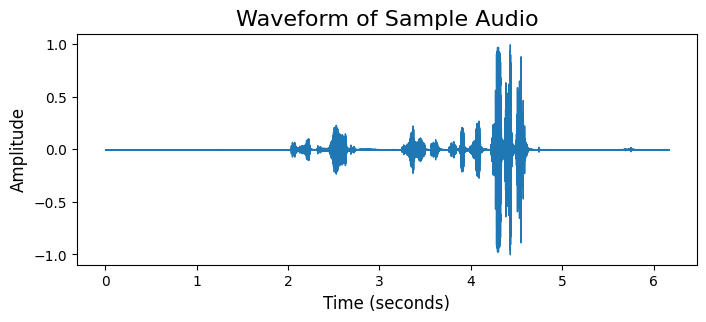

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import pandas as pd

# Sample DataFrame (just an example)
# If you already have a 'samples' DataFrame, you can skip this line and use your actual DataFrame
samples = pd.DataFrame({
    'File_Path': [r"E:\Samrudh\Project\Crosslingual Gender Detection Project\Organized Gender Dataset\Organized Gender Hindi Dataset\Male\3.1.anger-06.wav"]
})

# Ensure there are samples available in the DataFrame
if not samples.empty:
    # Select the first sample with 'Happy' emotion (you can adjust this based on your use case)
    sample_file = samples['File_Path'].iloc[0]  # Get the path of the audio file

    # Load the audio file
    audio_data, sr = librosa.load(sample_file, sr=None)  # Load the audio file (retain original sampling rate)
    
    # Play the audio
    display(Audio(sample_file))  # Display audio player
    
    # Plot the waveform
    plt.figure(figsize=(8, 3))
    librosa.display.waveshow(audio_data, sr=sr)
    plt.title(f'Waveform of Sample Audio', fontsize=16)
    plt.xlabel('Time (seconds)', fontsize=12)
    plt.ylabel('Amplitude', fontsize=12)
    plt.show()
else:
    print('No samples found for the emotion')


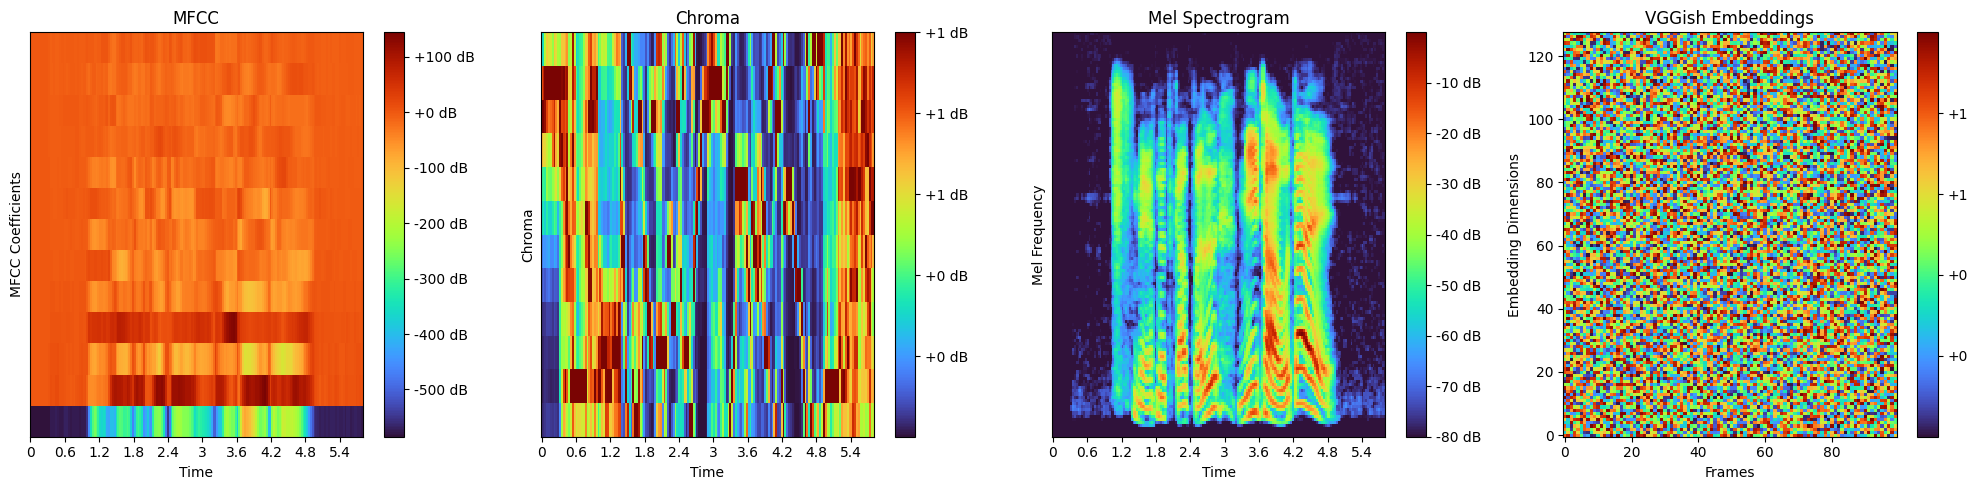

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load audio file
file_path = r'E:\Samrudh\Project\Final Project\Organized Gender Dataset\Organized Gender Hindi Dataset\Male\3.1.happy-08.wav'  
y, sr = librosa.load(file_path, sr=None)

# Extract features
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12)
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

# Placeholder for VGGish embeddings extraction
# Assuming vggish_embeddings is a 2D array with shape (frames, embedding_dim)
# Here we simulate the shape as an example; replace this with actual VGGish extraction
vggish_embeddings = np.random.rand(100, 128)  # Example random data, replace with real embeddings

# Plot all features side by side
plt.figure(figsize=(20, 5))

# MFCC heatmap
plt.subplot(1, 4, 1)
librosa.display.specshow(mfcc, x_axis='time', sr=sr, cmap='turbo')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.ylabel('MFCC Coefficients')

# Chroma heatmap
plt.subplot(1, 4, 2)
librosa.display.specshow(chroma, x_axis='time', sr=sr, cmap='turbo')
plt.colorbar(format='%+2.0f dB')
plt.title('Chroma')
plt.ylabel('Chroma')

# Mel Spectrogram heatmap
plt.subplot(1, 4, 3)
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), x_axis='time', sr=sr, cmap='turbo')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.ylabel('Mel Frequency')

# VGGish embeddings heatmap
plt.subplot(1, 4, 4)
plt.imshow(vggish_embeddings.T, aspect='auto', origin='lower', cmap='turbo')
plt.colorbar(format='%+2.0f')
plt.title('VGGish Embeddings')
plt.ylabel('Embedding Dimensions')
plt.xlabel('Frames')

plt.tight_layout()
plt.show()


# Feature extraction & training and testing

Combined dataset MFCC, Chroma, Mel Spectrogram by gender

In [ ]:
import numpy as np
import librosa
import os
from tqdm import tqdm

# Function to extract MFCC, Chroma, and additional features
def extract_mfcc_chroma(file_path, n_mfcc=40, n_chroma=12, n_mels=128):
    y, sr = librosa.load(file_path, sr=None)
    
    # Extract MFCCs
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    
    # Extract Chromagram
    chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=n_chroma)
    
    # Extract Mel Spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    
    # Extract Spectral Contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    
    # Extract Spectral Centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    
    # Extract Spectral Roll-off
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    
    # Extract Zero Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(y)
    
    # Extract Root Mean Square Energy
    rmse = librosa.feature.rms(y=y)

    # Concatenate all features
    features = np.concatenate((mfcc, chroma, mel_spectrogram, spectral_contrast, spectral_centroid, spectral_rolloff, zcr, rmse), axis=0)

    return features

# Function to process Combined audio files based on gender folders
def process_ravdess_files(source_dir, dest_dir):
    total_files = sum([len(files) for _, _, files in os.walk(source_dir) if any(f.lower().endswith('.wav') for f in files)])
    
    with tqdm(total=total_files, desc="Processing Combined dataset Audio Files", unit="file") as pbar:
        for root, _, files in os.walk(source_dir):
            # Get gender from the folder name
            gender = os.path.basename(root)  # Assumes gender is the last part of the path
            for file in files:
                if file.lower().endswith('.wav'):
                    file_path = os.path.join(root, file)
                    features = extract_mfcc_chroma(file_path)
                    
                    # Create destination folder based on gender
                    dest_folder = os.path.join(dest_dir, gender)
                    os.makedirs(dest_folder, exist_ok=True)
                    
                    # Save the features
                    feature_file = os.path.join(dest_folder, file.replace('.wav', '.npy'))
                    np.save(feature_file, features)
                    
                    pbar.update(1)
    
    print("Combined dataset MFCC, Chroma, and Mel Spectrogram feature extraction based on gender is complete!")

# Source and destination paths
source_path = r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Organized Gender Dataset\Organized Combined Gender Dataset'
dest_path = r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Feature Extraction\Combined dataset Gender MFCC_Chroma_Features'

# Process the Combined dataset
process_ravdess_files(source_path, dest_path)


Processing Combined dataset Audio Files: 100%|██████████| 13960/13960 [19:47<00:00, 11.75file/s]

Combined dataset MFCC, Chroma, and Mel Spectrogram feature extraction based on gender is complete!


Combined dataset VGGish by gender

In [ ]:
import numpy as np
import soundfile as sf
import os
import tensorflow as tf
import tensorflow_hub as hub
from tqdm import tqdm
import librosa

# Load the VGGish model
try:
    vggish_model_path = 'https://tfhub.dev/google/vggish/1'
    vggish_model = hub.load(vggish_model_path)
    print("VGGish model loaded successfully.")
except Exception as e:
    print(f"Error loading VGGish model: {e}")

# Function to extract VGGish embeddings
def extract_vggish_embeddings(file_path):
    y, sr = sf.read(file_path)
    y_resampled = librosa.resample(y, orig_sr=sr, target_sr=16000)  # Ensure audio is at 16kHz for VGGish
    embeddings = vggish_model(tf.cast(tf.reshape(y_resampled, [-1]), tf.float32))
    return embeddings.numpy()

# Main processing function for Combined dataset with gender folder structure only
def process_vggish_files(source_dir, dest_dir):
    # Count total valid files (for tqdm progress bar)
    total_files = sum([len(files) for root, _, files in os.walk(source_dir) if any(f.lower().endswith('.wav') for f in files)])
    
    with tqdm(total=total_files, desc="Processing Combined dataset Audio Files", unit="file") as pbar:
        for root, _, files in os.walk(source_dir):
            # Get gender from the folder name
            gender = os.path.basename(root)  # Assumes gender is the last part of the path
            for file in files:
                if file.lower().endswith('.wav'):
                    file_path = os.path.join(root, file)
                    embeddings = extract_vggish_embeddings(file_path)

                    # Create destination folder based on gender
                    dest_folder = os.path.join(dest_dir, gender)
                    os.makedirs(dest_folder, exist_ok=True)

                    # Save embeddings as .npy file
                    feature_file = os.path.join(dest_folder, file.replace('.wav', '.npy'))
                    np.save(feature_file, embeddings)
                    
                    pbar.update(1)

    print("Combined dataset VGGish embedding extraction based on gender is complete!")

# Define paths
source_path = r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Organized Gender Dataset\Organized Combined Gender Dataset'
dest_path = r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Feature Extraction\Combined dataset Gender VGGish_Embeddings'

# Process the Combined dataset
process_vggish_files(source_path, dest_path)


VGGish model loaded successfully.


Processing Combined dataset Audio Files: 100%|██████████| 13960/13960 [20:54<00:00, 11.13file/s] 

Combined dataset VGGish embedding extraction based on gender is complete!


### Combining Combined dataset Mfcc, chroma, mel spectrogram and Vggish by gender

In [ ]:
import os
import numpy as np
import torch
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed

# Define the base path
base_path = r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Feature Extraction'

# Define the paths for MFCC, Chroma, and VGGish features
combined_dataset_folders = [
    os.path.join(base_path, 'Combined dataset Gender MFCC_Chroma_Features'),
    os.path.join(base_path, 'Combined dataset Gender VGGish_Embeddings')
]

# Fixed shape that all tensors should be resized to
fixed_shape = (20, 450)

# Function to resize a single tensor to the fixed shape
def resize_tensor_to_fixed_shape(tensor, fixed_shape):
    if tensor.dim() == 2:
        resized_tensor = torch.zeros(fixed_shape)
        min_dims = [min(tensor.size(i), fixed_shape[i]) for i in range(len(fixed_shape))]
        resized_tensor[:min_dims[0], :min_dims[1]] = tensor[:min_dims[0], :min_dims[1]]
    elif tensor.dim() == 3:
        resized_tensor = torch.zeros(fixed_shape[0], fixed_shape[1], tensor.size(2))
        min_dims = [min(tensor.size(i), fixed_shape[i]) for i in range(len(fixed_shape))]
        resized_tensor[:min_dims[0], :min_dims[1], :tensor.size(2)] = tensor[:min_dims[0], :min_dims[1], :tensor.size(2)]
    else:
        raise ValueError(f"Unsupported tensor dimension: {tensor.dim()}")
    return resized_tensor.numpy()

# Function to process a single file (used for parallel processing)
def process_file(file_info):
    feature_path, fixed_shape = file_info
    feature = np.load(feature_path)
    tensor_feature = torch.tensor(feature)
    resized_feature = resize_tensor_to_fixed_shape(tensor_feature, fixed_shape)
    return resized_feature

# Asynchronous loading of .npy files
def load_file_in_parallel(file_list, batch_size=100):
    combined_features = []
    futures = []
    with ThreadPoolExecutor(max_workers=batch_size) as executor:
        for file_info in file_list:
            futures.append(executor.submit(process_file, file_info))

        for future in as_completed(futures):
            combined_features.append(future.result())

    return combined_features

# Function to collect .npy files recursively
def collect_npy_files(base_folder):
    npy_files = []
    for root, dirs, files in os.walk(base_folder):
        for file in files:
            if file.endswith('.npy'):
                feature_path = os.path.join(root, file)
                gender = os.path.basename(os.path.dirname(feature_path))  # Get the gender from the parent folder
                npy_files.append((feature_path, gender))
    return npy_files

# Function to load and process .npy files and save labels
def load_and_combine_features_in_batches(
        folders, 
        batch_size=100, 
        save_path='combined_dataset_gender_combined_features.npy', 
        label_save_path='combined_dataset_gender_combined_labels.npy', 
        fixed_shape=(20, 450)):
    
    total_files = 0
    file_list = []
    label_list = []

    # Collect all the .npy file paths and corresponding labels
    for folder in folders:
        npy_files = collect_npy_files(folder)
        for feature_path, gender in npy_files:
            file_list.append((feature_path, fixed_shape))
            label_list.append(gender)
            total_files += 1
                        
    print(f"Total number of feature files: {total_files}")
    
    file_count = 0
    combined_labels = []

    # Process files in parallel batches
    with tqdm(total=total_files, desc=f"Loading and resizing features to {fixed_shape}", unit="file") as pbar:
        for i in range(0, len(file_list), batch_size):
            batch_files = file_list[i:i + batch_size]
            resized_batch = load_file_in_parallel(batch_files, batch_size)
            
            combined_labels.extend(label_list[i:i + batch_size])
            
            save_combined_features_incrementally(resized_batch, save_path, append=(file_count > 0))
            file_count += len(resized_batch)
            pbar.update(len(resized_batch))

    # Save the combined labels
    np.save(label_save_path, combined_labels)

    print(f"Combined dataset Combined features and labels saved successfully")

# Function to save the combined features incrementally as a .npy file
def save_combined_features_incrementally(combined_features, save_path, append=False):
    combined_array = np.stack(combined_features)

    if append:
        if os.path.exists(save_path):
            existing_data = np.load(save_path)
            combined_array = np.concatenate((existing_data, combined_array), axis=0)

    np.save(save_path, combined_array)

# Load, combine, and save the features incrementally with multiprocessing
load_and_combine_features_in_batches(
    combined_dataset_folders,
    batch_size=100,
    save_path=os.path.join(base_path, "combined_dataset_gender_combined_features.npy"),
    label_save_path=os.path.join(base_path, "combined_dataset_gender_combined_labels.npy"),
    fixed_shape=fixed_shape
)


Total number of feature files: 27920


Loading and resizing features to (20, 450): 100%|██████████| 27920/27920 [44:36<00:00, 10.43file/s]


Combined dataset Combined features and labels saved successfully


### train and test gender combined dataset

#### Using ml models

Decision tree gender combined

In [ ]:
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, log_loss
from sklearn.metrics import accuracy_score

# Load your combined features and labels
features_path = r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Feature Extraction\combined_dataset_gender_combined_features.npy'
labels_path = r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Feature Extraction\combined_dataset_gender_combined_labels.npy'

X = np.load(features_path)  # Load features
y = np.load(labels_path)  # Load labels

# Check the shape of the features and labels
print(f"Original shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# If X is 3D, flatten it to 2D
if len(X.shape) == 3:
    print("Flattening the features from 3D to 2D...")
    X = X.reshape(X.shape[0], -1)  # Flattening
    print(f"New shape of X after flattening: {X.shape}")

# Split the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Start training the model
print("Training started...")

# Train the model on the training set
dt_classifier.fit(X_train, y_train)

# End of training
print("Training completed")

# Get predictions on the training data and testing data
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

# Accuracy and loss calculation for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_loss = log_loss(y_train, dt_classifier.predict_proba(X_train))

# Accuracy and loss calculation for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_loss = log_loss(y_test, dt_classifier.predict_proba(X_test))

# Print Classification Report for Test Data
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

# Print Accuracy, Loss, and F1 Score for training and testing sets
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Training Loss: {train_loss:.4f}")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Testing Loss: {test_loss:.4f}")

f1 = f1_score(y_test, y_test_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")


Original shape of X: (27920, 20, 450)
Shape of y: (27920,)
Flattening the features from 3D to 2D...
New shape of X after flattening: (27920, 9000)
Training started...
Training completed
Classification Report for Test Data:
              precision    recall  f1-score   support

      Female       0.84      0.84      0.84      4198
        Male       0.84      0.83      0.84      4178

    accuracy                           0.84      8376
   macro avg       0.84      0.84      0.84      8376
weighted avg       0.84      0.84      0.84      8376

Training Accuracy: 100.00%
Training Loss: 0.0000
Testing Accuracy: 83.56%
Testing Loss: 5.9255
F1 Score: 0.8356


Random forest gender combined

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, log_loss
import joblib

# Load your combined features and labels
features_path = r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Feature Extraction\combined_dataset_gender_combined_features.npy'
labels_path = r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Feature Extraction\combined_dataset_gender_combined_labels.npy'

X = np.load(features_path)  # Load features
y = np.load(labels_path)  # Load labels

# Check the shape of the features and labels
print(f"Original shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# If X is 3D, flatten it to 2D
if len(X.shape) == 3:
    X = X.reshape(X.shape[0], -1)  # Flattening

print(f"New shape of X after flattening: {X.shape}")

# Split the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1)

# Train the model on the training set
print("Training started...")
rf_classifier.fit(X_train, y_train)
print("Training completed.")

# Predict on both training and test sets
y_pred_train = rf_classifier.predict(X_train)
y_pred_test = rf_classifier.predict(X_test)

# Predict probabilities for calculating log loss
y_pred_train_prob = rf_classifier.predict_proba(X_train)
y_pred_test_prob = rf_classifier.predict_proba(X_test)

# Evaluation for training set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_loss = log_loss(y_train, y_pred_train_prob)

# Evaluation for test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test, average='weighted')
test_loss = log_loss(y_test, y_pred_test_prob)

# Print classification report for test data
print("Classification Report for Test Data:")
print(classification_report(y_test, y_pred_test))

# Print Accuracy, Loss, and F1 Score for training and testing sets
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Training Loss: {train_loss:.4f}")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Testing Loss: {test_loss:.4f}")
print(f"F1 Score: {test_f1:.4f}")


Original shape of X: (27920, 20, 450)
Shape of y: (27920,)
New shape of X after flattening: (27920, 9000)
Training started...
Training completed.
Classification Report for Test Data:
              precision    recall  f1-score   support

      Female       0.96      0.96      0.96      4198
        Male       0.96      0.96      0.96      4178

    accuracy                           0.96      8376
   macro avg       0.96      0.96      0.96      8376
weighted avg       0.96      0.96      0.96      8376

Training Accuracy: 99.93%
Training Loss: 0.1008
Testing Accuracy: 96.12%
Testing Loss: 0.2722
F1 Score: 0.9612


Xgb gender combined

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, log_loss
import joblib

# Load your combined features and labels
features_path = r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Feature Extraction\combined_dataset_gender_combined_features.npy'
labels_path = r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Feature Extraction\combined_dataset_gender_combined_labels.npy'

X = np.load(features_path)  # Load features
y = np.load(labels_path)  # Load labels

# Check the shape of the features and labels
print(f"Original shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# If X is 3D, flatten it to 2D
if len(X.shape) == 3:
    X = X.reshape(X.shape[0], -1)  # Flattening

print(f"New shape of X after flattening: {X.shape}")

# Encode the labels into numerical format using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Show the mapping of labels to numbers
print("Label encoding mapping:")
for label, number in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{label}: {number}")

# Split the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the model on the training set
print("Training started...")
xgb_classifier.fit(X_train, y_train)
print("Training completed.")

# Predict on the test set
y_pred = xgb_classifier.predict(X_test)
y_pred_train = xgb_classifier.predict(X_train)

# Predict probabilities for calculating log loss
y_pred_train_prob = xgb_classifier.predict_proba(X_train)
y_pred_test_prob = xgb_classifier.predict_proba(X_test)

# Decode the predicted and true labels back to their original form
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_train_decoded = label_encoder.inverse_transform(y_pred_train)
y_train_decoded = label_encoder.inverse_transform(y_train)

# Evaluation: print classification report and accuracy
print("Classification Report for Test Data:")
print(classification_report(y_test_decoded, y_pred_decoded))

# Evaluation for training set
train_accuracy = accuracy_score(y_train_decoded, y_pred_train_decoded)
train_loss = log_loss(y_train, y_pred_train_prob)

# Evaluation for test set
test_accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
test_f1 = f1_score(y_test_decoded, y_pred_decoded, average='weighted')
test_loss = log_loss(y_test, y_pred_test_prob)

# Print Accuracy, Loss, and F1 Score for training and testing sets
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Training Loss: {train_loss * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Testing Loss: {test_loss * 100:.2f}%")
print(f"F1 Score: {test_f1:.4f}")


Original shape of X: (27920, 20, 450)
Shape of y: (27920,)
New shape of X after flattening: (27920, 9000)
Label encoding mapping:
Female: 0
Male: 1
Training started...


e:\Samrudh\Python\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:41:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training completed.
Classification Report for Test Data:
              precision    recall  f1-score   support

      Female       0.97      0.97      0.97      4198
        Male       0.97      0.97      0.97      4178

    accuracy                           0.97      8376
   macro avg       0.97      0.97      0.97      8376
weighted avg       0.97      0.97      0.97      8376

Training Accuracy: 99.98%
Training Loss: 0.85%
Testing Accuracy: 96.90%
Testing Loss: 9.07%
F1 Score: 0.9690


Knn gender combined

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, log_loss
import joblib

# Load your combined features and labels
features_path = r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Feature Extraction\combined_dataset_gender_combined_features.npy'
labels_path = r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Feature Extraction\combined_dataset_gender_combined_labels.npy'

X = np.load(features_path)  # Load features
y = np.load(labels_path)  # Load labels

# Check the shape of the features and labels
print(f"Original shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# If X is 3D, flatten it to 2D
if len(X.shape) == 3:
    X = X.reshape(X.shape[0], -1)  # Flattening

print(f"New shape of X after flattening: {X.shape}")

# Split the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize K-Nearest Neighbors classifier with k=5 (you can change this value)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the training set
print("Training started...")
knn_classifier.fit(X_train, y_train)
print("Training completed.")

# Predict on the test set
y_pred = knn_classifier.predict(X_test)
y_pred_train = knn_classifier.predict(X_train)

# Predict probabilities for calculating log loss
y_pred_train_prob = knn_classifier.predict_proba(X_train)
y_pred_test_prob = knn_classifier.predict_proba(X_test)

# Evaluation: print classification report and accuracy
print("Classification Report for Test Data:")
print(classification_report(y_test, y_pred))

# Evaluation for training set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_loss = log_loss(y_train, y_pred_train_prob)

# Evaluation for test set
test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred, average='weighted')
test_loss = log_loss(y_test, y_pred_test_prob)

# Print Accuracy, Loss, and F1 Score for training and testing sets
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Training Loss: {train_loss * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Testing Loss: {test_loss * 100:.2f}%")
print(f"F1 Score: {test_f1:.4f}")


Original shape of X: (27920, 20, 450)
Shape of y: (27920,)
New shape of X after flattening: (27920, 9000)
Training started...
Training completed.
Classification Report for Test Data:
              precision    recall  f1-score   support

      Female       0.82      0.89      0.85      4198
        Male       0.88      0.81      0.84      4178

    accuracy                           0.85      8376
   macro avg       0.85      0.85      0.85      8376
weighted avg       0.85      0.85      0.85      8376

Training Accuracy: 90.53%
Training Loss: 21.93%
Testing Accuracy: 84.83%
Testing Loss: 78.39%
F1 Score: 0.8480


Svm gender combined

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score, log_loss
from sklearn.preprocessing import StandardScaler
import joblib

# Load your combined features and labels
features_path = r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Feature Extraction\combined_dataset_gender_combined_features.npy'
labels_path = r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Feature Extraction\combined_dataset_gender_combined_labels.npy'

X = np.load(features_path)  # Load features
y = np.load(labels_path)  # Load labels

# Check the shape of the features and labels
print(f"Original shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# If X is 3D, flatten it to 2D
if len(X.shape) == 3:
    X = X.reshape(X.shape[0], -1)  # Flattening

print(f"New shape of X after flattening: {X.shape}")

# Split the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (SVM benefits from standardized features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42, probability=True)

# Train the model on the scaled training set
print("Training started...")
svm_classifier.fit(X_train_scaled, y_train)
print("Training completed.")

# Predict on the scaled test set
y_pred = svm_classifier.predict(X_test_scaled)
y_pred_train = svm_classifier.predict(X_train_scaled)

# Predict probabilities for calculating log loss
y_pred_train_prob = svm_classifier.predict_proba(X_train_scaled)
y_pred_test_prob = svm_classifier.predict_proba(X_test_scaled)

# Evaluation: print classification report and accuracy for test set
print("Classification Report for Test Data:")
print(classification_report(y_test, y_pred))

# Evaluation for training set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_loss = log_loss(y_train, y_pred_train_prob)

# Evaluation for test set
test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred, average='weighted')
test_loss = log_loss(y_test, y_pred_test_prob)

# Print Accuracy, Loss, and F1 Score for training and testing sets
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Training Loss: {train_loss * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Testing Loss: {test_loss * 100:.2f}%")
print(f"F1 Score: {test_f1:.4f}")


Original shape of X: (27920, 20, 450)
Shape of y: (27920,)
New shape of X after flattening: (27920, 9000)
Training started...
Training completed.
Classification Report for Test Data:
              precision    recall  f1-score   support

      Female       0.94      0.94      0.94      4198
        Male       0.94      0.94      0.94      4178

    accuracy                           0.94      8376
   macro avg       0.94      0.94      0.94      8376
weighted avg       0.94      0.94      0.94      8376

Training Accuracy: 98.50%
Training Loss: 35.79%
Testing Accuracy: 93.64%
Testing Loss: 45.42%
F1 Score: 0.9364


Log reg gender combined

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, log_loss
import joblib

# Load your combined features and labels
features_path = r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Feature Extraction\combined_dataset_gender_combined_features.npy'
labels_path = r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Feature Extraction\combined_dataset_gender_combined_labels.npy'

X = np.load(features_path)  # Load features
y = np.load(labels_path)  # Load labels

# Check the shape of the features and labels
print(f"Original shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# If X is 3D, flatten it to 2D
if len(X.shape) == 3:
    X = X.reshape(X.shape[0], -1)  # Flattening

print(f"New shape of X after flattening: {X.shape}")

# Split the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression classifier
log_reg_classifier = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs', multi_class='multinomial') 
# You can also use 'ovr' for binary problems or smaller datasets

# Train the model on the training set
print("Training started...")
log_reg_classifier.fit(X_train, y_train)
print("Training completed.")

# Predict on the test set
y_pred = log_reg_classifier.predict(X_test)
y_pred_train = log_reg_classifier.predict(X_train)

# Predict probabilities for calculating log loss
y_pred_train_prob = log_reg_classifier.predict_proba(X_train)
y_pred_test_prob = log_reg_classifier.predict_proba(X_test)

# Evaluation: print classification report and accuracy for test set
print("Classification Report for Test Data:")
print(classification_report(y_test, y_pred))

# Evaluation for training set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_loss = log_loss(y_train, y_pred_train_prob)

# Evaluation for test set
test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred, average='weighted')
test_loss = log_loss(y_test, y_pred_test_prob)

# Print Accuracy, Loss, and F1 Score for training and testing sets
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Training Loss: {train_loss * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Testing Loss: {test_loss * 100:.2f}%")
print(f"F1 Score: {test_f1:.4f}")


Original shape of X: (27920, 20, 450)
Shape of y: (27920,)
New shape of X after flattening: (27920, 9000)
Training started...


e:\Samrudh\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
e:\Samrudh\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training completed.
Classification Report for Test Data:
              precision    recall  f1-score   support

      Female       0.95      0.95      0.95      4198
        Male       0.95      0.95      0.95      4178

    accuracy                           0.95      8376
   macro avg       0.95      0.95      0.95      8376
weighted avg       0.95      0.95      0.95      8376

Training Accuracy: 98.91%
Training Loss: 3.72%
Testing Accuracy: 94.96%
Testing Loss: 124.68%
F1 Score: 0.9496


Ensemble gender combined

In [ ]:
# Required libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, log_loss
import joblib  # For saving models

# Load your combined features and labels
features_path = r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Feature Extraction\combined_dataset_gender_combined_features.npy'
labels_path = r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Feature Extraction\combined_dataset_gender_combined_labels.npy'

X = np.load(features_path)  # Load features
y = np.load(labels_path)  # Load labels

# Check the shape of the features and labels
print(f"Original shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# If X is 3D, flatten it to 2D
if len(X.shape) == 3:
    X = X.reshape(X.shape[0], -1)  # Flattening
    print(f"Flattened shape of X: {X.shape}")

# Split the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (SVM and Logistic Regression benefit from standardized features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize individual classifiers
print("Training individual classifiers...")

dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
svm_classifier = SVC(kernel='linear', random_state=42, probability=True)  # Enable probability for soft voting
log_reg_classifier = LogisticRegression(random_state=42, max_iter=2000, solver='lbfgs', multi_class='multinomial')
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

print("Training individual classifiers completed")

# Creating a VotingClassifier with soft voting
voting_clf = VotingClassifier(
    estimators=[('dt', dt_classifier), 
                ('rf', rf_classifier), 
                ('knn', knn_classifier), 
                ('svm', svm_classifier), 
                ('log_reg', log_reg_classifier),
                ('xgb', xgb_classifier)],
    voting='soft'  # Soft voting (based on predicted probabilities)
)

# Train the VotingClassifier on the training data
print("Training Voting Classifier started...")
voting_clf.fit(X_train_scaled, y_train)
print("Training Voting Classifier completed")

# Make predictions using the VotingClassifier
final_predictions = voting_clf.predict(X_test_scaled)

# Evaluate the VotingClassifier's performance
voting_accuracy = accuracy_score(y_test, final_predictions)
print(f"Voting Classifier accuracy: {voting_accuracy * 100:.2f}%")

# Print classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, final_predictions))

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, voting_clf.predict(X_train_scaled))
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Encode string labels to numerical values for the XGBoost training
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encode the training labels
y_test_encoded = label_encoder.transform(y_test)  # Encode the test labels

# Calculate and print the log loss for training and testing
train_pred_prob = voting_clf.predict_proba(X_train_scaled)  # Get predicted probabilities for training
test_pred_prob = voting_clf.predict_proba(X_test_scaled)  # Get predicted probabilities for testing

train_log_loss = log_loss(y_train_encoded, train_pred_prob)
test_log_loss = log_loss(y_test_encoded, test_pred_prob)

print(f"Training Loss: {train_log_loss:.4f}")
print(f"Testing Loss: {test_log_loss:.4f}")

# Final Accuracy and F1 score
accuracy = accuracy_score(y_test, final_predictions)
print(f"Final Accuracy: {accuracy * 100:.2f}%")

f1 = f1_score(y_test, final_predictions, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Save the trained VotingClassifier model
model_save_path = r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Trained Models\combined_gender_ensemble_model.joblib'
joblib.dump(voting_clf, model_save_path)
print(f"Model saved to {model_save_path}")


Original shape of X: (27920, 20, 450)
Shape of y: (27920,)
Flattened shape of X: (27920, 9000)
Training individual classifiers...
Training individual classifiers completed
Training Voting Classifier started...


e:\Samrudh\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
e:\Samrudh\Python\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:27:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Voting Classifier completed
Voting Classifier accuracy: 96.57%
Classification Report:
              precision    recall  f1-score   support

      Female       0.97      0.96      0.97      4198
        Male       0.96      0.97      0.97      4178

    accuracy                           0.97      8376
   macro avg       0.97      0.97      0.97      8376
weighted avg       0.97      0.97      0.97      8376

Training Accuracy: 99.95%
Training Loss: 0.0944
Testing Loss: 0.1907
Final Accuracy: 96.57%
F1 Score: 0.9657
Model saved to E:\Samrudh\Project\Crosslingual Gender Detection Project\Trained Models\combined_gender_ensemble_model.joblib


#### Using dl models

Cnn gender combined

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score

# Load your precomputed features and labels
features = np.load(r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Feature Extraction\combined_dataset_gender_combined_features.npy')
labels = np.load(r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Feature Extraction\combined_dataset_gender_combined_labels.npy')
model_save_path = (r'E:\Samrudh\Project\Crosslingual Gender Detection Project\Trained Models\combined_gender_cnn_model.keras')

# Check the shape of your data
print("Features shape:", features.shape)  # Ensure this is suitable for CNN input
print("Labels shape:", labels.shape)

# Check unique labels before encoding
print("Unique labels before encoding:", np.unique(labels))

# Convert string labels to integers using LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)  # Convert to numerical labels

# Check the transformed labels and their unique values
print("Unique transformed labels:", np.unique(labels))

# Reshape features if necessary
if len(features.shape) == 2:  # If 2D, assume it's (num_samples, num_features)
    height, width = features.shape[1], 1  # Assuming single channel
    features = features.reshape(features.shape[0], height, width, 1)
elif len(features.shape) == 3:  # If 3D, may already be in (num_samples, height, width, channels)
    features = features.reshape(features.shape[0], features.shape[1], features.shape[2], 1)
else:
    raise ValueError("Unexpected number of dimensions in features array.")

print(f"New shape {features.shape}")

# Since it's binary classification, no need for one-hot encoding
# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Input shape for CNN
input_shape = X_train.shape[1:]  # e.g., (height, width, channels)
print("Input shape for CNN:", input_shape)

# Function to build the CNN model for binary classification
def build_cnn_model(input_shape):
    model = Sequential()
    
    # First Convolutional Layer
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    
    # Second Convolutional Layer
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    
    # Third Convolutional Layer
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    
    # Flatten the output
    model.add(Flatten())
    
    # Fully Connected Layers
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    
    # Output Layer for binary classification with sigmoid activation
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification
    
    return model

# Build the model
model = build_cnn_model(input_shape)

# Compile the model with binary_crossentropy
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
#model.summary()

# Callbacks for early stopping and saving the best model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint(model_save_path, monitor='val_loss', save_best_only=True)

# Print message before training
print("Training model...")

# Train the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val),
                    epochs=50, batch_size=32,
                    verbose=1,
                    callbacks=[reduce_lr, early_stopping, checkpoint])

print("Training completed")

# Get the final training accuracy and loss
final_train_loss = history.history['loss'][-1]
final_train_accuracy = history.history['accuracy'][-1]

# Load the best model
model.load_weights(model_save_path)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print final training loss and accuracy
print(f"Training Loss: {final_train_loss * 100:.2f}%")
print(f"Training Accuracy: {final_train_accuracy * 100:.2f}%")

# Print test loss and accuracy
print(f"Test Loss: {test_loss * 100:.2f}")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_true = y_test

# Calculate the F1 score
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_))

# Save the trained model
model.save(model_save_path)
print(f"Model saved at '{model_save_path}'.")


Features shape: (27920, 20, 450)
Labels shape: (27920,)
Unique labels before encoding: ['Female' 'Male']
Unique transformed labels: [0 1]
New shape (27920, 20, 450, 1)
Input shape for CNN: (20, 450, 1)


e:\Samrudh\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model...
Epoch 1/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 403s 909ms/step - accuracy: 0.5805 - loss: 3.1573 - val_accuracy: 0.6830 - val_loss: 0.7724 - learning_rate: 0.0010
Epoch 2/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 378s 882ms/step - accuracy: 0.6766 - loss: 0.5152 - val_accuracy: 0.7082 - val_loss: 0.4388 - learning_rate: 0.0010
Epoch 3/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 381s 889ms/step - accuracy: 0.7208 - loss: 0.4304 - val_accuracy: 0.7249 - val_loss: 0.4117 - learning_rate: 0.0010
Epoch 4/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 387s 905ms/step - accuracy: 0.7252 - loss: 0.4120 - val_accuracy: 0.7387 - val_loss: 0.3984 - learning_rate: 0.0010
Epoch 5/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 428s 873ms/step - accuracy: 0.7247 - loss: 0.4139 - val_accuracy: 0.7314 - val_loss: 0.4143 - learning_rate: 0.0010
Epoch 6/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 373s 871ms/step - accuracy: 0.7814 - loss: 0.3814 - val_accuracy: 0.5713 - val_loss: 3.5927 - learning_rate: 0.0010
Epoch 7/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 378s 8

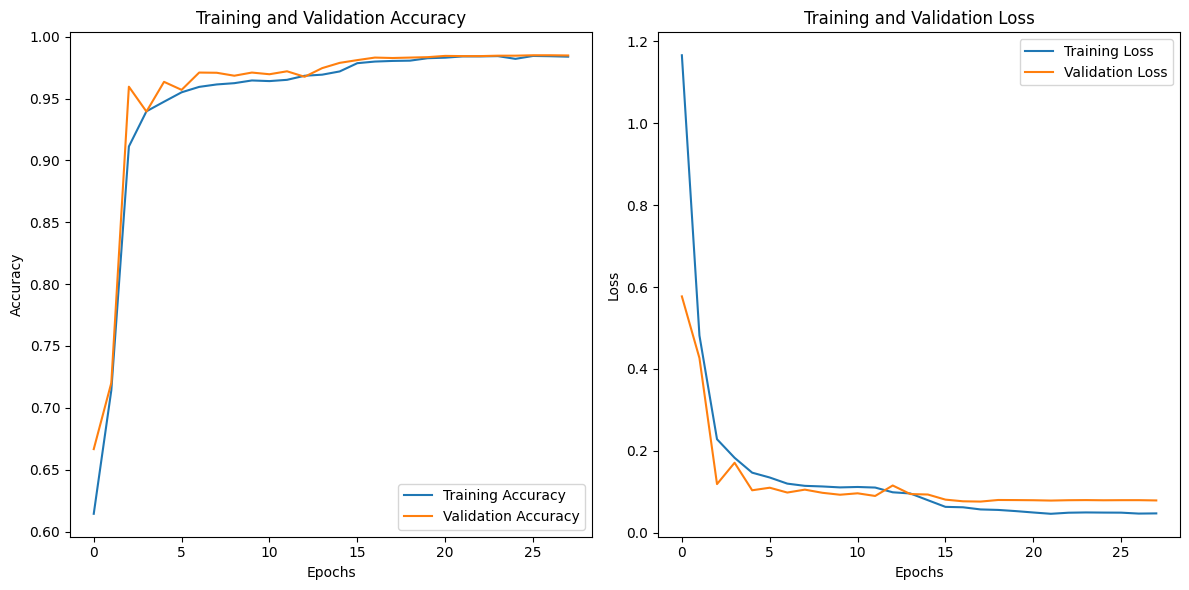

In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Bilstm\gru gender combined

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score

# Load your precomputed features and labels
features = np.load(r'/kaggle/input/gender-features/combined_dataset_gender_combined_features.npy')
labels = np.load(r'/kaggle/input/gender-features/combined_dataset_gender_combined_labels.npy')
model_save_path = r'/kaggle/working/combined_gender_lstm_model.keras'

# Check the shape of your data
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

# Check unique labels before encoding
print("Unique labels before encoding:", np.unique(labels))

# Convert string labels to integers using LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

# Check the transformed labels and their unique values
print("Unique transformed labels:", np.unique(labels))

# Reshape features if necessary for LSTM input
# LSTMs and GRUs expect input of shape (samples, timesteps, features)
if len(features.shape) == 2:  # Assuming it's (num_samples, num_features)
    features = features.reshape(features.shape[0], 1, features.shape[1])  # Adding timesteps dimension

print(f"New shape for LSTM {features.shape}")

# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Input shape for LSTM and GRU
input_shape = X_train.shape[1:]  # (timesteps, features)
print("Input shape for LSTM and GRU:", input_shape)

# Function to build the model with LSTM and GRU layers
def build_bilstm_gru_model(input_shape):
    model = Sequential()
    
    # First LSTM Layer
    model.add(LSTM(256, return_sequences=True, input_shape=input_shape, activation='tanh', go_backwards=False))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    
    # Second GRU Layer
    model.add(GRU(128, return_sequences=True, activation='tanh'))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    
    # Third Bi-directional LSTM Layer
    model.add(Bidirectional(LSTM(128, return_sequences=False, activation='tanh', go_backwards=False)))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    
    # Fully Connected Layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    
    # Output Layer (sigmoid for binary classification)
    model.add(Dense(1, activation='sigmoid'))
    
    return model

# Build the model with LSTM and GRU layers
model = build_bilstm_gru_model(input_shape)

# Compile the model with binary_crossentropy
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and saving the best model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-8, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint(model_save_path, monitor='val_loss', save_best_only=True)

# Print message before training
print("Training LSTM and GRU model...")

# Train the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val),
                    epochs=50, batch_size=32,
                    verbose=1,
                    callbacks=[reduce_lr, early_stopping, checkpoint])

print("Training completed")

# Get the final training accuracy and loss
final_train_loss = history.history['loss'][-1]
final_train_accuracy = history.history['accuracy'][-1]

# Load the best model
model.load_weights(model_save_path)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print final training loss and accuracy
print(f"Training Loss: {final_train_loss * 100:.2f}%")
print(f"Training Accuracy: {final_train_accuracy * 100:.2f}%")

# Print test loss and accuracy
print(f"Test Loss: {test_loss * 100:.2f}")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_true = y_test

# Calculate the F1 score
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_))

# Save the trained model
model.save(model_save_path)
print(f"Model saved at '{model_save_path}'.")


Features shape: (27920, 20, 450)
Labels shape: (27920,)
Unique labels before encoding: ['Female' 'Male']
Unique transformed labels: [0 1]
New shape for LSTM (27920, 20, 450)
Input shape for LSTM and GRU: (20, 450)
Training LSTM and GRU model...


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.7440 - loss: 0.4977 - val_accuracy: 0.8620 - val_loss: 0.2973 - learning_rate: 0.0010
Epoch 2/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8358 - loss: 0.3358 - val_accuracy: 0.8448 - val_loss: 0.3173 - learning_rate: 0.0010
Epoch 3/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8587 - loss: 0.3011 - val_accuracy: 0.8709 - val_loss: 0.2796 - learning_rate: 0.0010
Epoch 4/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8755 - loss: 0.2860 - val_accuracy: 0.8777 - val_loss: 0.2689 - learning_rate: 0.0010
Epoch 5/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8862 - loss: 0.2673 - val_accuracy: 0.8946 - val_loss: 0.2530 - learning_rate: 0.0010
Epoch 6/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8927 - loss: 0.2513 - val_accuracy: 0.9079 - val_loss: 0.2223 - learning_rate: 0.0010
Epoch 7/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9049 - loss: 0

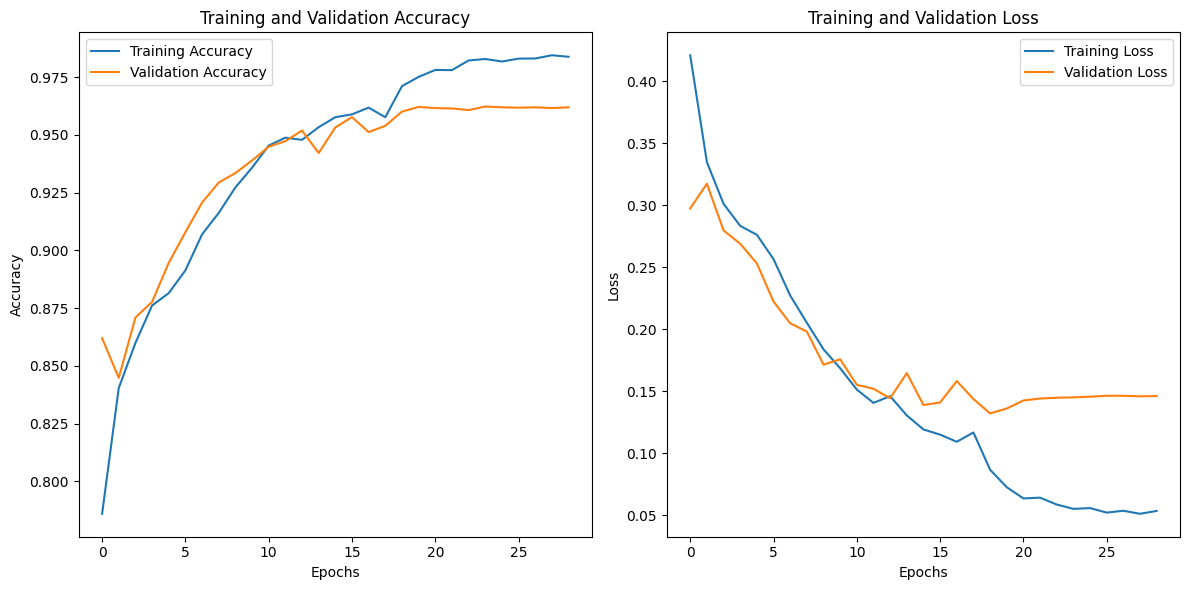

In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Results

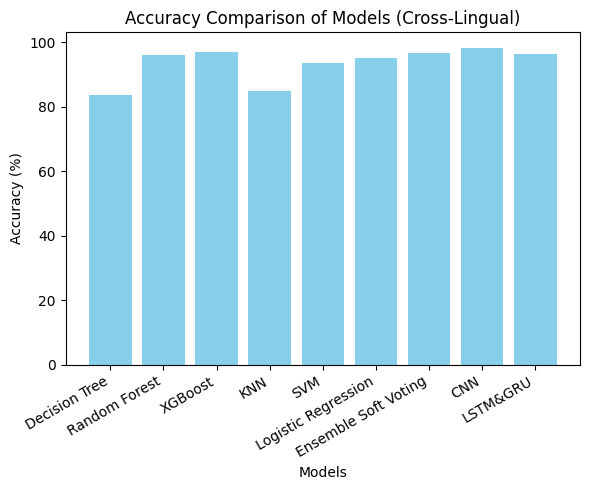

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Example accuracy results for different datasets (replace with actual results)
accuracy_results = {
    'Combined': {
        'Decision Tree': 83.56, 'Random Forest': 96.12, 'XGBoost': 96.90,
        'KNN': 84.83, 'SVM': 93.64, 'Logistic Regression': 94.96,
        'Ensemble Soft Voting': 96.57, 'CNN': 98.11, 'LSTM&GRU': 96.22,
    }
}

# Extract models and their accuracies
models = list(accuracy_results['Combined'].keys())
accuracies = list(accuracy_results['Combined'].values())
n_models = len(models)

# X-axis positions for each model
x = np.arange(n_models)

# Create the plot
fig, ax = plt.subplots(figsize=(6, 5))

# Plot the bars
ax.bar(x, accuracies, color='skyblue')

# Labels and titles
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy Comparison of Models (Cross-Lingual)')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=30, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


## Testing

In [ ]:
import os
import numpy as np
import librosa
import cv2
import joblib
import tensorflow as tf
from tensorflow.keras.models import load_model
import torch
from IPython.display import Audio, display

# Fixed shape for resizing
fixed_shape = (20, 450)

# Function to resize a single tensor to the fixed shape (20, 450)
def resize_tensor_to_fixed_shape(tensor, fixed_shape):
    if tensor.ndim == 2:  # Handle 2D tensors
        resized_tensor = torch.zeros(fixed_shape)
        min_dims = [min(tensor.size(i), fixed_shape[i]) for i in range(len(fixed_shape))]
        resized_tensor[:min_dims[0], :min_dims[1]] = tensor[:min_dims[0], :min_dims[1]]
    elif tensor.ndim == 3:  # Handle 3D tensors
        resized_tensor = torch.zeros(fixed_shape[0], fixed_shape[1], tensor.size(2))
        min_dims = [min(tensor.size(i), fixed_shape[i]) for i in range(len(fixed_shape))]
        resized_tensor[:min_dims[0], :min_dims[1], :tensor.size(2)] = tensor[:min_dims[0], :min_dims[1], :tensor.size(2)]
    else:
        raise ValueError(f"Unsupported tensor dimension: {tensor.ndim}")
    return resized_tensor.numpy()

# Function to identify file type (audio or video)
def get_file_type(file_path):
    _, extension = os.path.splitext(file_path)
    extension = extension.lower()
    if extension in ['.wav', '.mp3', '.flac', '.ogg']:
        return 'audio'
    else:
        raise ValueError("Unsupported file type. Please provide an audio or video file.")

# Load the model
def load_gender_model(model_path):
    if model_path.endswith('.keras'):
        model = load_model(model_path)
    elif model_path.endswith('.joblib'):
        model = joblib.load(model_path)
    else:
        raise ValueError("Unsupported model file format. Use .keras or .joblib.")
    
    return model

# Feature extraction for audio files
def extract_features_from_audio(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    
    # Stack MFCCs and Chroma
    features = np.vstack((mfccs, chroma))
    return features

# Function to predict gender
def predict_gender(features, model):
    # Predict the probabilities for the classes
    prediction = model.predict(features)

    # Log the raw prediction output for debugging
    print(f"Raw prediction output: {prediction}")

    # Since we expect a single output neuron, use sigmoid
    predicted_class = (prediction > 0.5).astype(int)

    # Determine the gender based on the predicted class
    gender = "Male" if predicted_class[0][0] == 1 else "Female"
    
    # Calculate confidence as the probability
    confidence = prediction[0][0] * 100 if predicted_class[0][0] == 1 else (1 - prediction[0][0]) * 100

    return gender, confidence

# Function to play audio
def play_audio(audio_path):
    return Audio(audio_path)

# Main function to process the input file and make predictions
def predict_gender_from_file(file_path, model_path):
    file_type = get_file_type(file_path)
    model = load_gender_model(model_path)

    if file_type == 'audio':
        features = extract_features_from_audio(file_path)
        # Resize features to fixed shape
        features = resize_tensor_to_fixed_shape(torch.tensor(features), fixed_shape)
        features = features.reshape(1, features.shape[0], features.shape[1])
        
        # Play the audio
        audio_widget = play_audio(file_path)
        display(audio_widget)

    gender, confidence = predict_gender(features, model)
    print(f"Predicted Gender: {gender}, Confidence: {confidence:.2f}%")

# Example usage
file_path = r'C:\Users\HP\B.Tech\3rd year\5th sem\Minor Project\Project\Testing\Audio files\Female\hindi 2.mp3'
model_path = r'C:\Users\HP\B.Tech\3rd year\5th sem\Minor Project\Project\Testing\gender_cnn_model.keras'

# Call the function to predict gender
predict_gender_from_file(file_path, model_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 904ms/step
Raw prediction output: [[1.]]
Predicted Gender: Male, Confidence: 100.00%
